In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import selenium

In [3]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn import tree
from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [4]:
phish_data = pd.read_csv('phishing_site_urls.csv', encoding='latin1')

In [5]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [6]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [8]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [9]:
#visualizing target_col
#sns.set_style('darkgrid')
#sns.barplot(label_counts.index,label_counts.Label)

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [11]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.1843634000397287 sec


In [14]:
phish_data.sample(5)

,URL,Label,text_tokenized
379639,lotsofessays.com/viewpaper/1701286.html,good,"[lotsofessays, com, viewpaper, html]"
162768,cupwire.hotink.net/articles/49031,good,"[cupwire, hotink, net, articles]"
484708,two.jdfslfdsgy.biz/vzc3eex4jg\ndkoawit6.com/ik...,bad,"[two, jdfslfdsgy, biz, vzc, eex, jg, ndkoawit,..."
287519,barnesandnoble.com/s/Everett-Ruess,good,"[barnesandnoble, com, s, Everett, Ruess]"
410502,orkut.com/Community?cmm=103478516&hl=en,good,"[orkut, com, Community, cmm, hl, en]"


In [15]:
stemmer = SnowballStemmer("english") # choose a language

In [16]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 61.007235799974296 sec


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
484861,two.jdfslfdsgy.biz/7xitsg88z6\ndkoawit6.com/ik...,bad,"[two, jdfslfdsgy, biz, xitsg, z, ndkoawit, com...","[two, jdfslfdsgi, biz, xitsg, z, ndkoawit, com..."
322445,enotes.com/topic/Never_Cry_Wolf_(film),good,"[enotes, com, topic, Never, Cry, Wolf, film]","[enot, com, topic, never, cri, wolf, film]"
181073,en.wikipedia.org/wiki/Talk:Privately_held_company,good,"[en, wikipedia, org, wiki, Talk, Privately, he...","[en, wikipedia, org, wiki, talk, privat, held,..."
281613,aopa.org/airports/KMKC,good,"[aopa, org, airports, KMKC]","[aopa, org, airport, kmkc]"
332183,facebook.com/people/Lynn-Cohen-Mangrella/15038...,good,"[facebook, com, people, Lynn, Cohen, Mangrella]","[facebook, com, peopl, lynn, cohen, mangrella]"


In [18]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.32010269997408614 sec


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
327529,facebook.com/jamesenox,good,"[facebook, com, jamesenox]","[facebook, com, jamesenox]",facebook com jamesenox
411875,papillongallery.com/new.html,good,"[papillongallery, com, new, html]","[papillongalleri, com, new, html]",papillongalleri com new html
360021,imdb.com/title/tt0093640/reviews,good,"[imdb, com, title, tt, reviews]","[imdb, com, titl, tt, review]",imdb com titl tt review
320409,elanguage.com/,good,"[elanguage, com]","[elanguag, com]",elanguag com
278193,amazon.com/s?ie=UTF8&keywords=rush%20tom%20saw...,good,"[amazon, com, s, ie, UTF, keywords, rush, tom,...","[amazon, com, s, ie, utf, keyword, rush, tom, ...",amazon com s ie utf keyword rush tom sawyer rh...


In [20]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [21]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [22]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweiraÂ¯&nvinipÂ¿ncHÂ¯wVÃ¶%ÃÃ¥yDaHÃ°Ã»/ÃyE...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-Ã³i...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,YÃ¬ÃªÂ koÃ£ÃÂ»ÃÂ§DÃ©ÃlÂ½Ã±Â¡Ã¢Ã¢qtÃ²Â¸/...,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [23]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [24]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

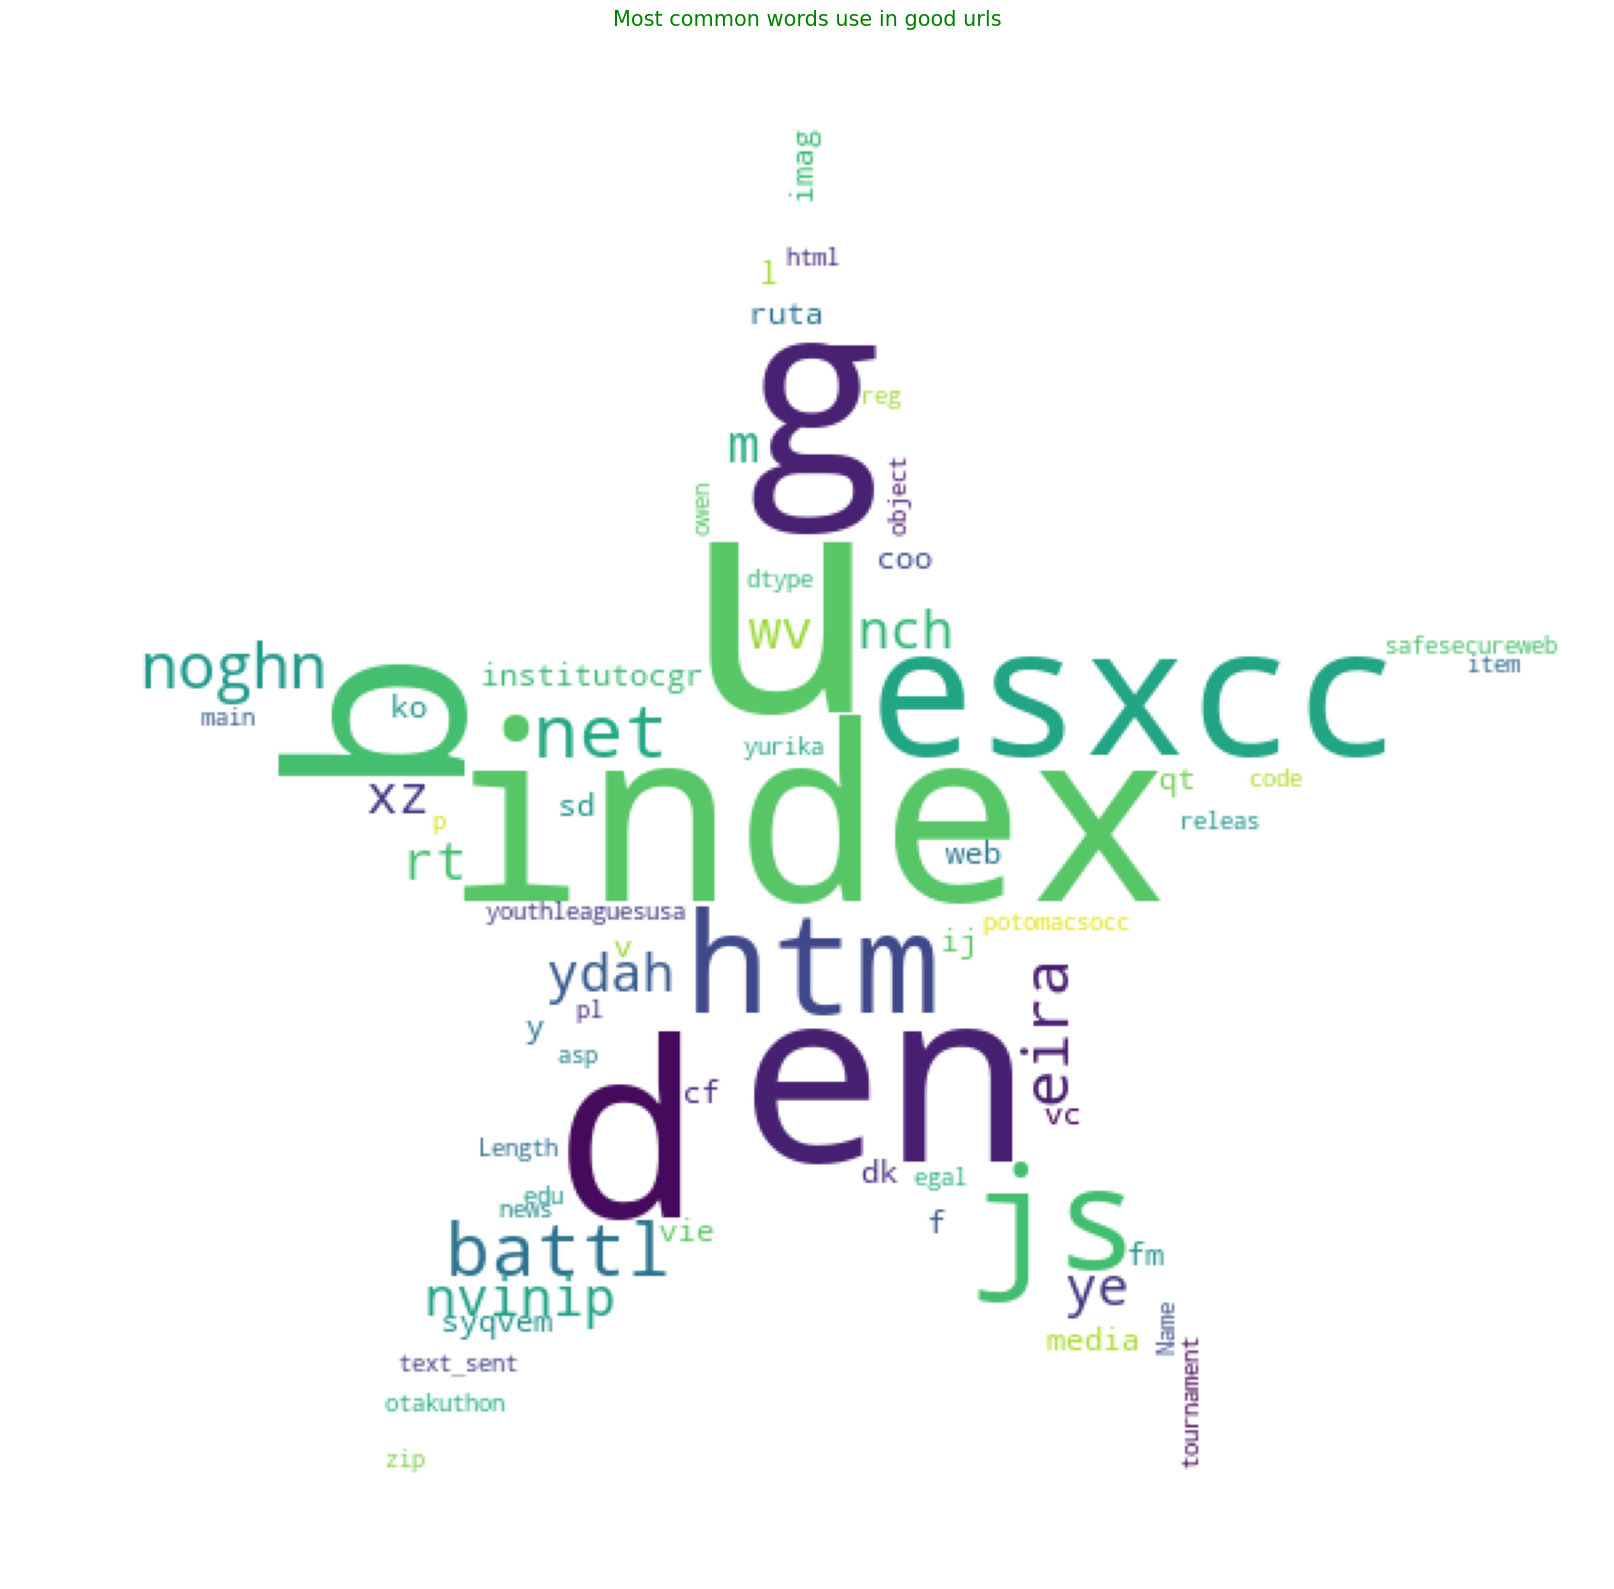

In [25]:
common_text = str(data)
common_mask = np.array(Image.open('star1.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [26]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

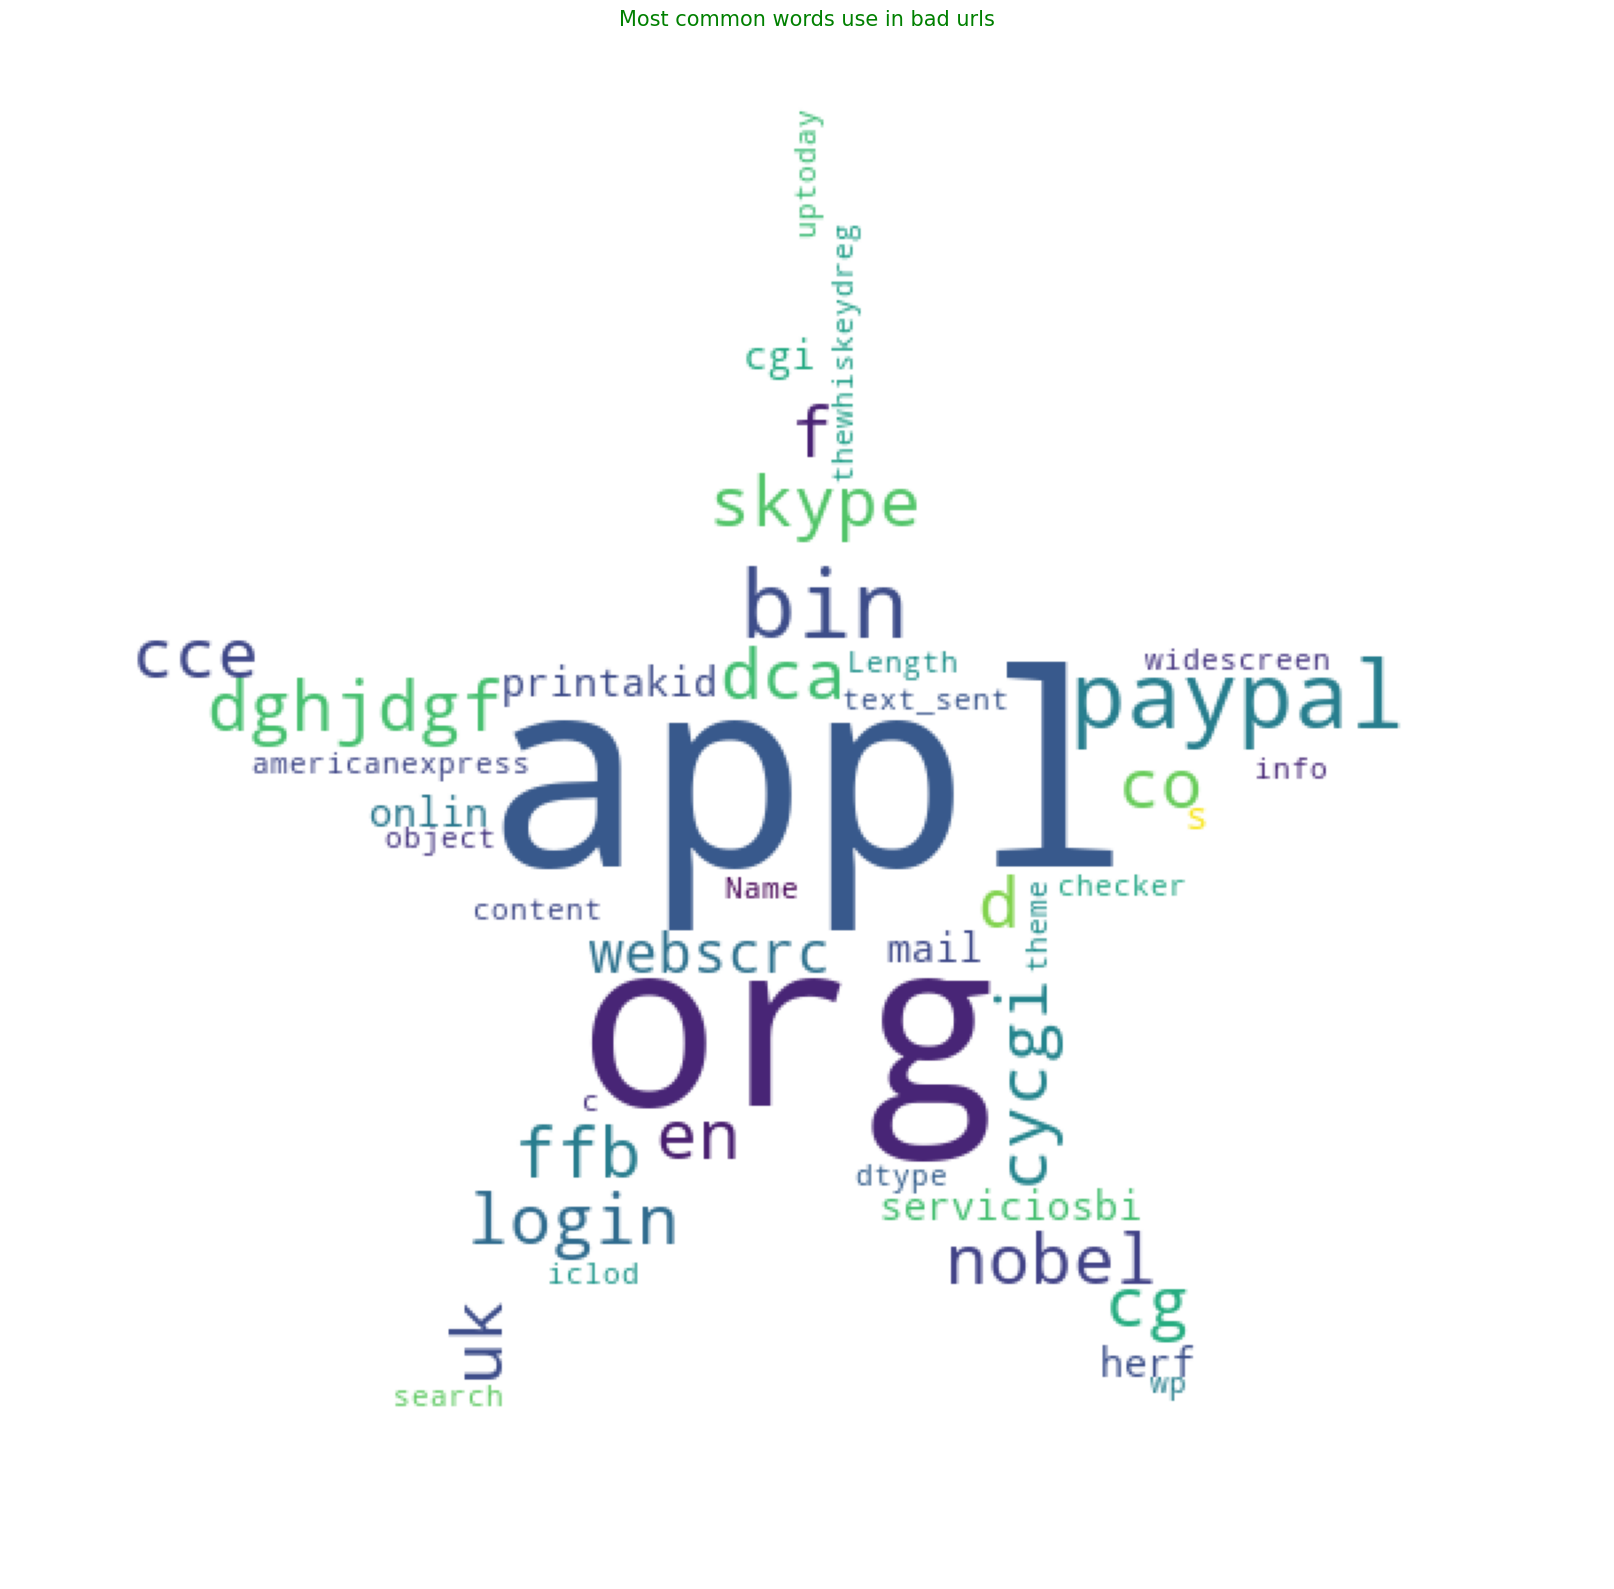

In [27]:
common_text = str(data)
common_mask = np.array(Image.open('star1.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [28]:
#create cv object
cv = CountVectorizer()

In [29]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [30]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [32]:
# create lr object
lr = LogisticRegression()
lr.fit(trainX, trainY)

LogisticRegression()

In [33]:
lr.score(testX,testY)

0.9641029001652869

In [34]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9781266914072265
Testing Accuracy : 0.9641029001652869

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.93     36607
        Good       0.99      0.96      0.98    100730

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

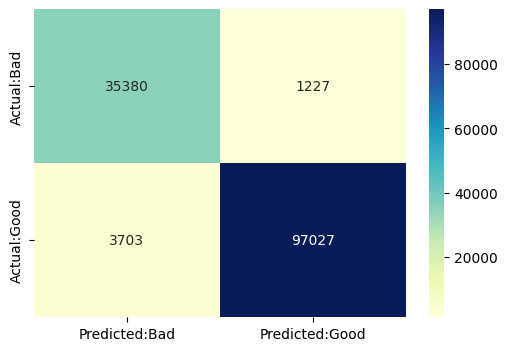

In [35]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [36]:
# create mnb object
mnb = MultinomialNB()

In [37]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [38]:
mnb.score(testX,testY)

0.9577025856105783

In [39]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9739617338456199
Testing Accuracy : 0.9577025856105783

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.93      0.92     38260
        Good       0.97      0.97      0.97     99077

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

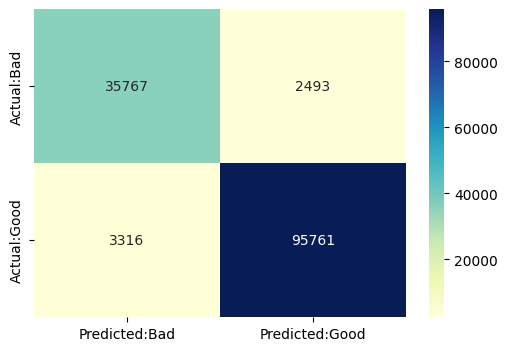

In [40]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [41]:
# Create an instance of Decision Tree classifier
#dt = DecisionTreeClassifier()
# Train the classifier
#dt.fit(trainX, trainY)

In [42]:
# Evaluate the classifier
#dt.score(testX, testY)

In [43]:
#Scores_ml['DecisionTree'] = np.round(dt.score(testX,testY),2)

In [44]:
#print('Training Accuracy:', dt.score(trainX,trainY))
#print('Testing Accuracy:', dt.score(testX,testY))

# Confusion Matrix
#con_mat = pd.DataFrame(confusion_matrix(dt.predict(testX), testY),
                          #columns=['Predicted:Bad', 'Predicted:Good'],
                          #index=['Actual:Bad', 'Actual:Good'])

#print('\nCLASSIFICATION REPORT\n')
#print(classification_report(dt.predict(testX), testY,
                            #target_names=['Bad', 'Good']))

#print('\nCONFUSION MATRIX')
#plt.figure(figsize=(6, 4))
#sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

In [45]:
#knn = KNeighborsClassifier()
#knn.fit(trainX, trainY)

In [46]:
#knn.score(testX, testY)

In [47]:
#Scores_ml['KNN'] = np.round(knn.score(testX,testY),2)

In [48]:
#print('Training Accuracy:', knn.score(trainX,trainY))
#print('Testing Accuracy:', knn.score(testX,testY))

# Confusion Matrix
#con_mat = pd.DataFrame(confusion_matrix(knn.predict(testX), testY),
                          #columns=['Predicted:Bad', 'Predicted:Good'],
                          #index=['Actual:Bad', 'Actual:Good'])

#print('\nCLASSIFICATION REPORT\n')
#print(classification_report(knn.predict(testX), testY,
                            #target_names=['Bad', 'Good']))

#print('\nCONFUSION MATRIX')
#plt.figure(figsize=(6, 4))
#sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

In [49]:
rf = RandomForestClassifier()
rf.fit(trainX, trainY)

RandomForestClassifier()

In [50]:
rf.score(testX, testY)

0.9766268376329759

In [51]:
Scores_ml['RandomForest'] = np.round(rf.score(testX,testY),2)

Training Accuracy: 0.9998786434276921
Testing Accuracy: 0.9766268376329759

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.96      0.96     38675
        Good       0.99      0.98      0.98     98662

    accuracy                           0.98    137337
   macro avg       0.97      0.97      0.97    137337
weighted avg       0.98      0.98      0.98    137337


CONFUSION MATRIX


<Axes: >

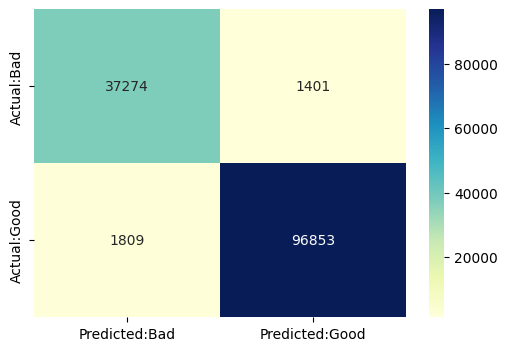

In [52]:
print('Training Accuracy:', rf.score(trainX,trainY))
print('Testing Accuracy:', rf.score(testX,testY))

# Confusion Matrix
con_mat = pd.DataFrame(confusion_matrix(rf.predict(testX), testY),
                          columns=['Predicted:Bad', 'Predicted:Good'],
                          index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(rf.predict(testX), testY,
                            target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

In [53]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), RandomForestClassifier())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [54]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [55]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('randomforestclassifier', RandomForestClassifier())])

In [56]:
pipeline_ls.score(testX,testY) 

0.9709109708235946

Training Accuracy : 0.9999417488452922
Testing Accuracy : 0.9709109708235946

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.95      0.95     39503
        Good       0.98      0.98      0.98     97834

    accuracy                           0.97    137337
   macro avg       0.97      0.96      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

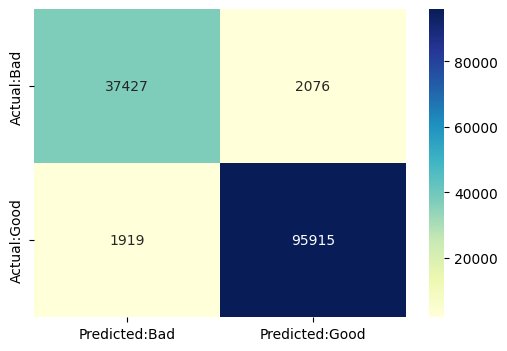

In [57]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [58]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [59]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9709109708235946


In [60]:
#* Bad links => this are phishing sites
#yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
#fazan-pacir.rs/temp/libraries/ipad
#www.tubemoviez.exe
#svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

#* Good links => this are not phishing sites
#www.youtube.com/
#youtube.com/watch?v=qI0TQJI3vdU
#www.retailhellunderground.com/
#restorevisioncenters.com/html/technology.html

In [61]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
